In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk

In [185]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [186]:
df.shape

(5572, 5)

In [187]:
# Step by Step How this Project is built

# 1. Data Cleaning
# 2. EDA (Exploratory Data Analysis)
# 3. Data Preprocessing
# 4. Model Building
# 5. Model Evaluation
# 6. Model Deployment


## 1. Data Cleaning

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Droping unwanted columns

In [189]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df.sample(5)

,v1,v2
1635,ham,You have come into my life and brought the sun...
1966,ham,What's a feathery bowa? Is that something guys...
3171,ham,Do u still have plumbers tape and a wrench we ...
4037,ham,Hope you are not scared!
2952,spam,"URGENT! Your mobile was awarded a å£1,500 Bonu..."


In [190]:
# Renaming the cols
df.rename(columns={'v1':"Target",'v2':"Text"},inplace=True)

In [191]:
encoder = LabelEncoder()

In [192]:
df["Target"]=encoder.fit_transform(df['Target'])

In [193]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [194]:
# Missing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [195]:
# Check for duplicate values
df.duplicated().sum()

np.int64(403)

In [196]:
# Remove duplicate value
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [197]:
df.shape

(5169, 2)

# EDA 

In [198]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [199]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

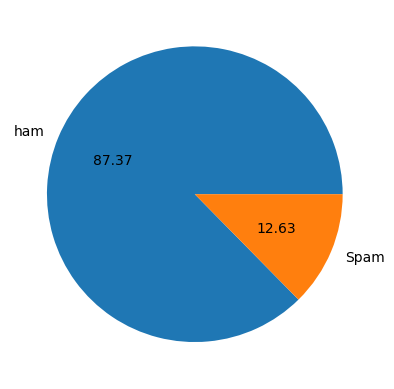

In [200]:
plt.pie(df['Target'].value_counts(),labels=["ham","Spam"],autopct='%0.2f')
plt.show()

In [201]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [202]:
df['num_Characters']=df["Text"].apply(len)

In [203]:
df.head()

,Target,Text,num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [204]:
df['num_words'] = df['Text'].fillna("").apply(lambda x: len(x.split()))


In [205]:
df.head()

,Target,Text,num_Characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [208]:
import nltk, os

# Create a local nltk_data folder in the current project directory
local_nltk_path = os.path.abspath('./nltk_data')

# Download punkt there
nltk.download('punkt', download_dir=local_nltk_path)

# Tell nltk to look there for resources
nltk.data.path.clear()
nltk.data.path.append(local_nltk_path)


[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\Vikas\Desktop\ML\Project\spam
[nltk_data]     detection\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [209]:
from nltk.tokenize import word_tokenize, sent_tokenize

df['num_words'] = df['Text'].fillna("").apply(lambda x: len(word_tokenize(x)))
df['num_sentences'] = df['Text'].fillna("").apply(lambda x: len(sent_tokenize(x)))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'c:\\Users\\Vikas\\Desktop\\ML\\Project\\spam detection\\nltk_data'
**********************************************************************
